In [13]:
from helpers import *
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from helpersTimo import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import math 

import csv
from urllib.parse import unquote


In [2]:
def mean_median_change_in_rank_of_peoples(df_pagerank_before, df_pagerank_after, gender_dict):
    """
    Returns the mean and median of the change in rank of the nodes that are people or not and graphs the distribution of the change in rank

    Args:
        df_pagerank_before (dataframe): dataframe with the PageRank of each node in the fisrt ranking
        df_pagerank_after (dataframe): dataframe with the PageRank of each node in the second ranking
        gender_dict (dict): Dictionary of the genders of the nodes
    
    Returns:
        mean_people (float): mean of the change in rank of the people
        median_people (float): median of the change in rank of the people
        mean_not_people (float): mean of the change in rank of the not people
        median_not_people (float): median of the change in rank of the not people

    """
    df_diff = compare_rankings2(df_pagerank_before, df_pagerank_after)

    desired_genders = ['Male', 'Female']

    # Use the map function to map nodes to their genders
    df_diff['node_gender'] = df_diff.index.map(gender_dict)

    #Filter rows based on the desired genders
    df_diff_subset_people = df_diff[df_diff['node_gender'].isin(desired_genders)]

    df_diff_subset_not_people = df_diff[~df_diff['node_gender'].isin(desired_genders)]
    

    # plot the diff of the df_diff_subset_people
    fig, axes = plt.subplots(1, 1, figsize=(15, 10))
    axes.hist(df_diff_subset_not_people["Diff"], bins=100, alpha=0.5, label='Not people', color="#B80C09", density=True)
    axes.hist(df_diff_subset_people["Diff"], bins=100, alpha=0.5, label='People', color="#01BAEF", density=True)

    axes.axvline(df_diff_subset_people["Diff"].median(), color='blue', linestyle='dashed', linewidth=1, alpha=0.5, label='Median')
    axes.axvline(df_diff_subset_not_people["Diff"].median(), color='red', linestyle='dashed', linewidth=1, alpha=0.5, label='Median not people')
    axes.legend()
    axes.set_title("Difference of the rank between the two rankings")
    axes.set_xlabel("Difference of the rank")
    axes.set_ylabel("Number of nodes")
    axes.grid(True)
    axes.text(100, 0.00075, 'Better ranked after', bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "rarrow, pad=0.3", 'ec': 'green'})
    axes.text(-100, 0.00075, 'Better ranked before', ha= "right", bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "larrow, pad=0.3", 'ec': 'red'})
    plt.show()

    return df_diff_subset_people["Diff"].mean(), df_diff_subset_people["Diff"].median(), df_diff_subset_not_people["Diff"].mean(), df_diff_subset_not_people["Diff"].median()

In [3]:
dfs = preprocessing()
folder_path = "dataset/wikispeedia_paths-and-graph/"
dfs["article"] = pd.read_csv(folder_path + "articleAndGender.csv", sep=",")
gender_dict = dfs["article"].set_index("article")['gender'].to_dict()

In [4]:
## Use Examples ##
print(dfs["article"].loc[dfs["article"]["article"] == "United_States"].values[0][1]) 
print(gender_dict["United_States"])

Unknown
Unknown


In [5]:
graph_female, name_targets_F = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Female")

In [6]:
graph_female, name_targets_F = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Female")
graph_male, name_targets_M = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Male")
df_pagerank_female = get_df_pagerank(graph_female)
df_pagerank_male = get_df_pagerank(graph_male)

In [7]:
## J'ai plus de nodes qu'avant !!!????
graph_female.number_of_nodes()

1175

In [8]:
## J'ai plus de nodes qu'avant !!!????
graph_male.number_of_nodes()

3400

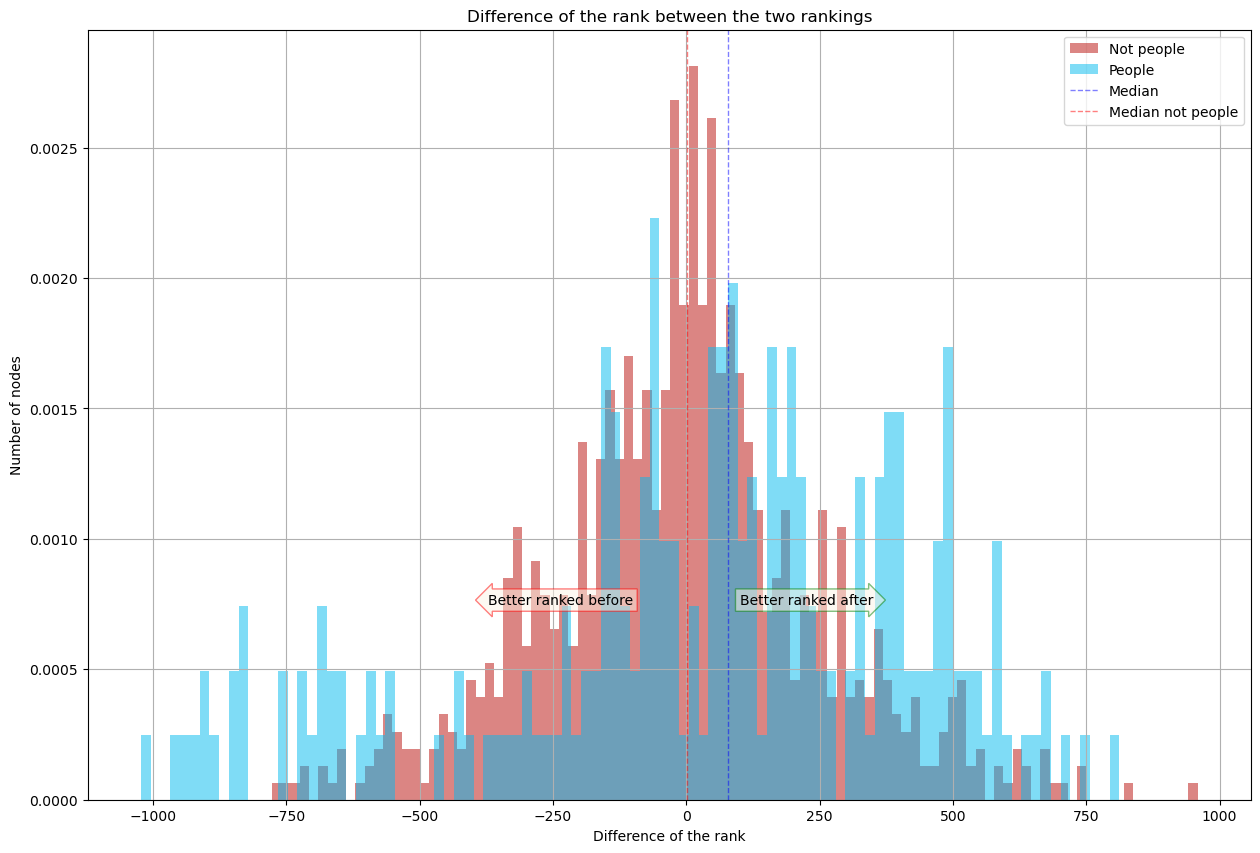

(24.96818181818182, 77.5, -6.234960272417707, 1.0)

In [9]:
mean_median_change_in_rank_of_peoples(df_pagerank_female, df_pagerank_male, gender_dict)

In [10]:
links_network = create_graph_links(dfs["links"])
df_pagerank_links = get_df_pagerank(links_network)

In [11]:
network_both_gender, endnode_names_both_gender = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"] , gender_dict, "Male", last_node_from_path= False, both_gender=True) 
print(network_both_gender.number_of_nodes())
df_pagerank_both_gend = get_df_pagerank(network_both_gender)

3474


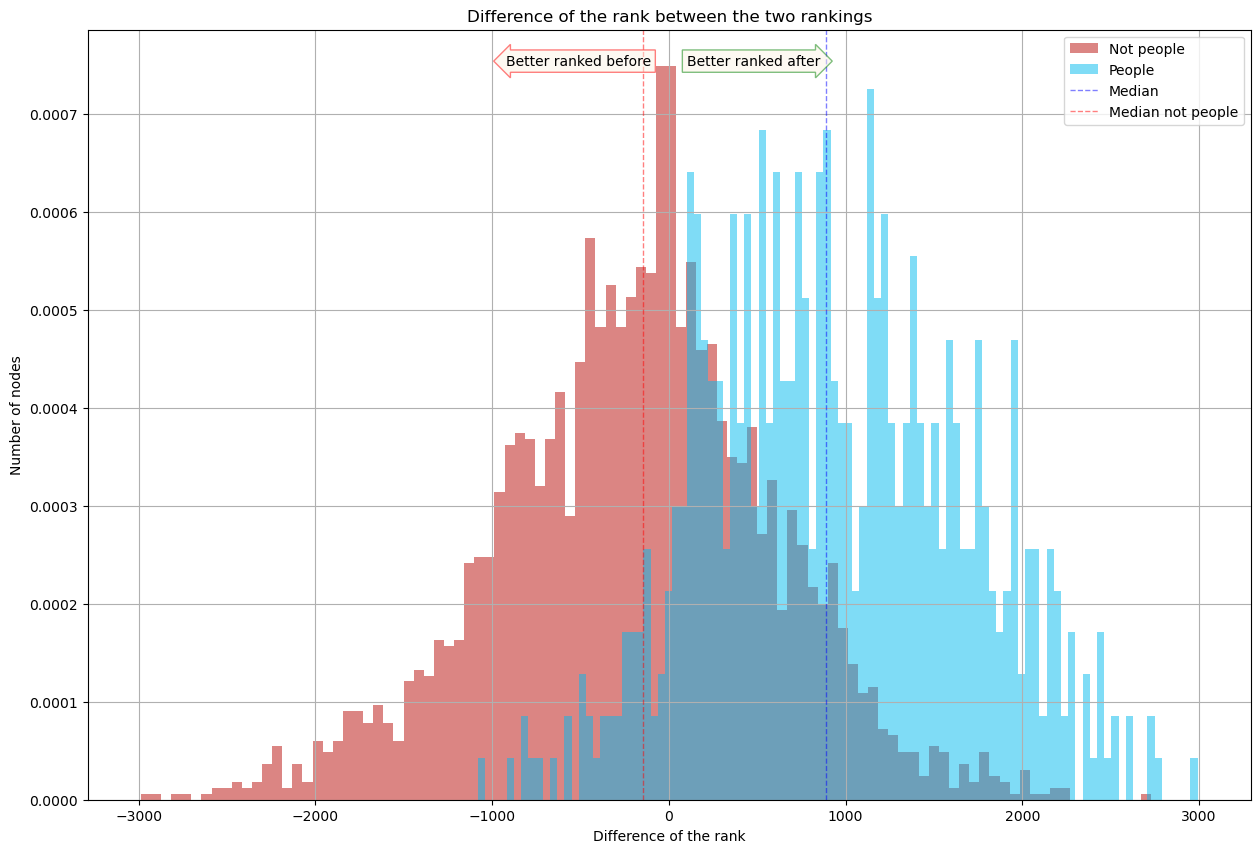

(939.9391304347826, 887.0, -186.49585921325053, -146.5)

In [12]:
mean_median_change_in_rank_of_peoples(df_pagerank_links, df_pagerank_both_gend, gender_dict)

In [15]:
# Load cartergories dictionnary with the thre first subcategories
result_dict, all_articles = create_dictionary_from_tsv("dataset/wikispeedia_paths-and-graph/categories.tsv")

In [16]:
rank_both_gender = sort_and_rank(df_pagerank_both_gend)

In [17]:
def get_cat(Node):
    try:
        return result_dict[Node]["main_subject"]
    except KeyError as e:
        return np.nan

rank_both_gender["MainCat"] = rank_both_gender.apply(lambda row: get_cat(row["Node"]), axis=1)   
all_cat = rank_both_gender["MainCat"].value_counts().index.to_list()


In [18]:
def graph_category_rank(df_rank):
    fig, axes = plt.subplots(5, 3, figsize=(20, 25), sharex=True, sharey=True)
    colors = plt.cm.tab20(range(20))

    for i in range(5):
        for j in range(3):
            category = all_cat[3*i+j]
            df_subset_cat = df_rank.loc[df_rank["MainCat"] == category, :]
            axes[i, j].hist(df_subset_cat["Rank"], bins=100, alpha=0.5, label=category, color=colors[3*i+j], density=True)
            axes[i, j].set_title(category)
            axes[i, j].axvline(df_subset_cat["Rank"].median(), color="Black", linestyle='dashed', linewidth=1, alpha=0.75, label='Median')
            axes[i, j].set_xlabel("Rank")
            axes[i, j].set_ylabel("Number of nodes normalized")

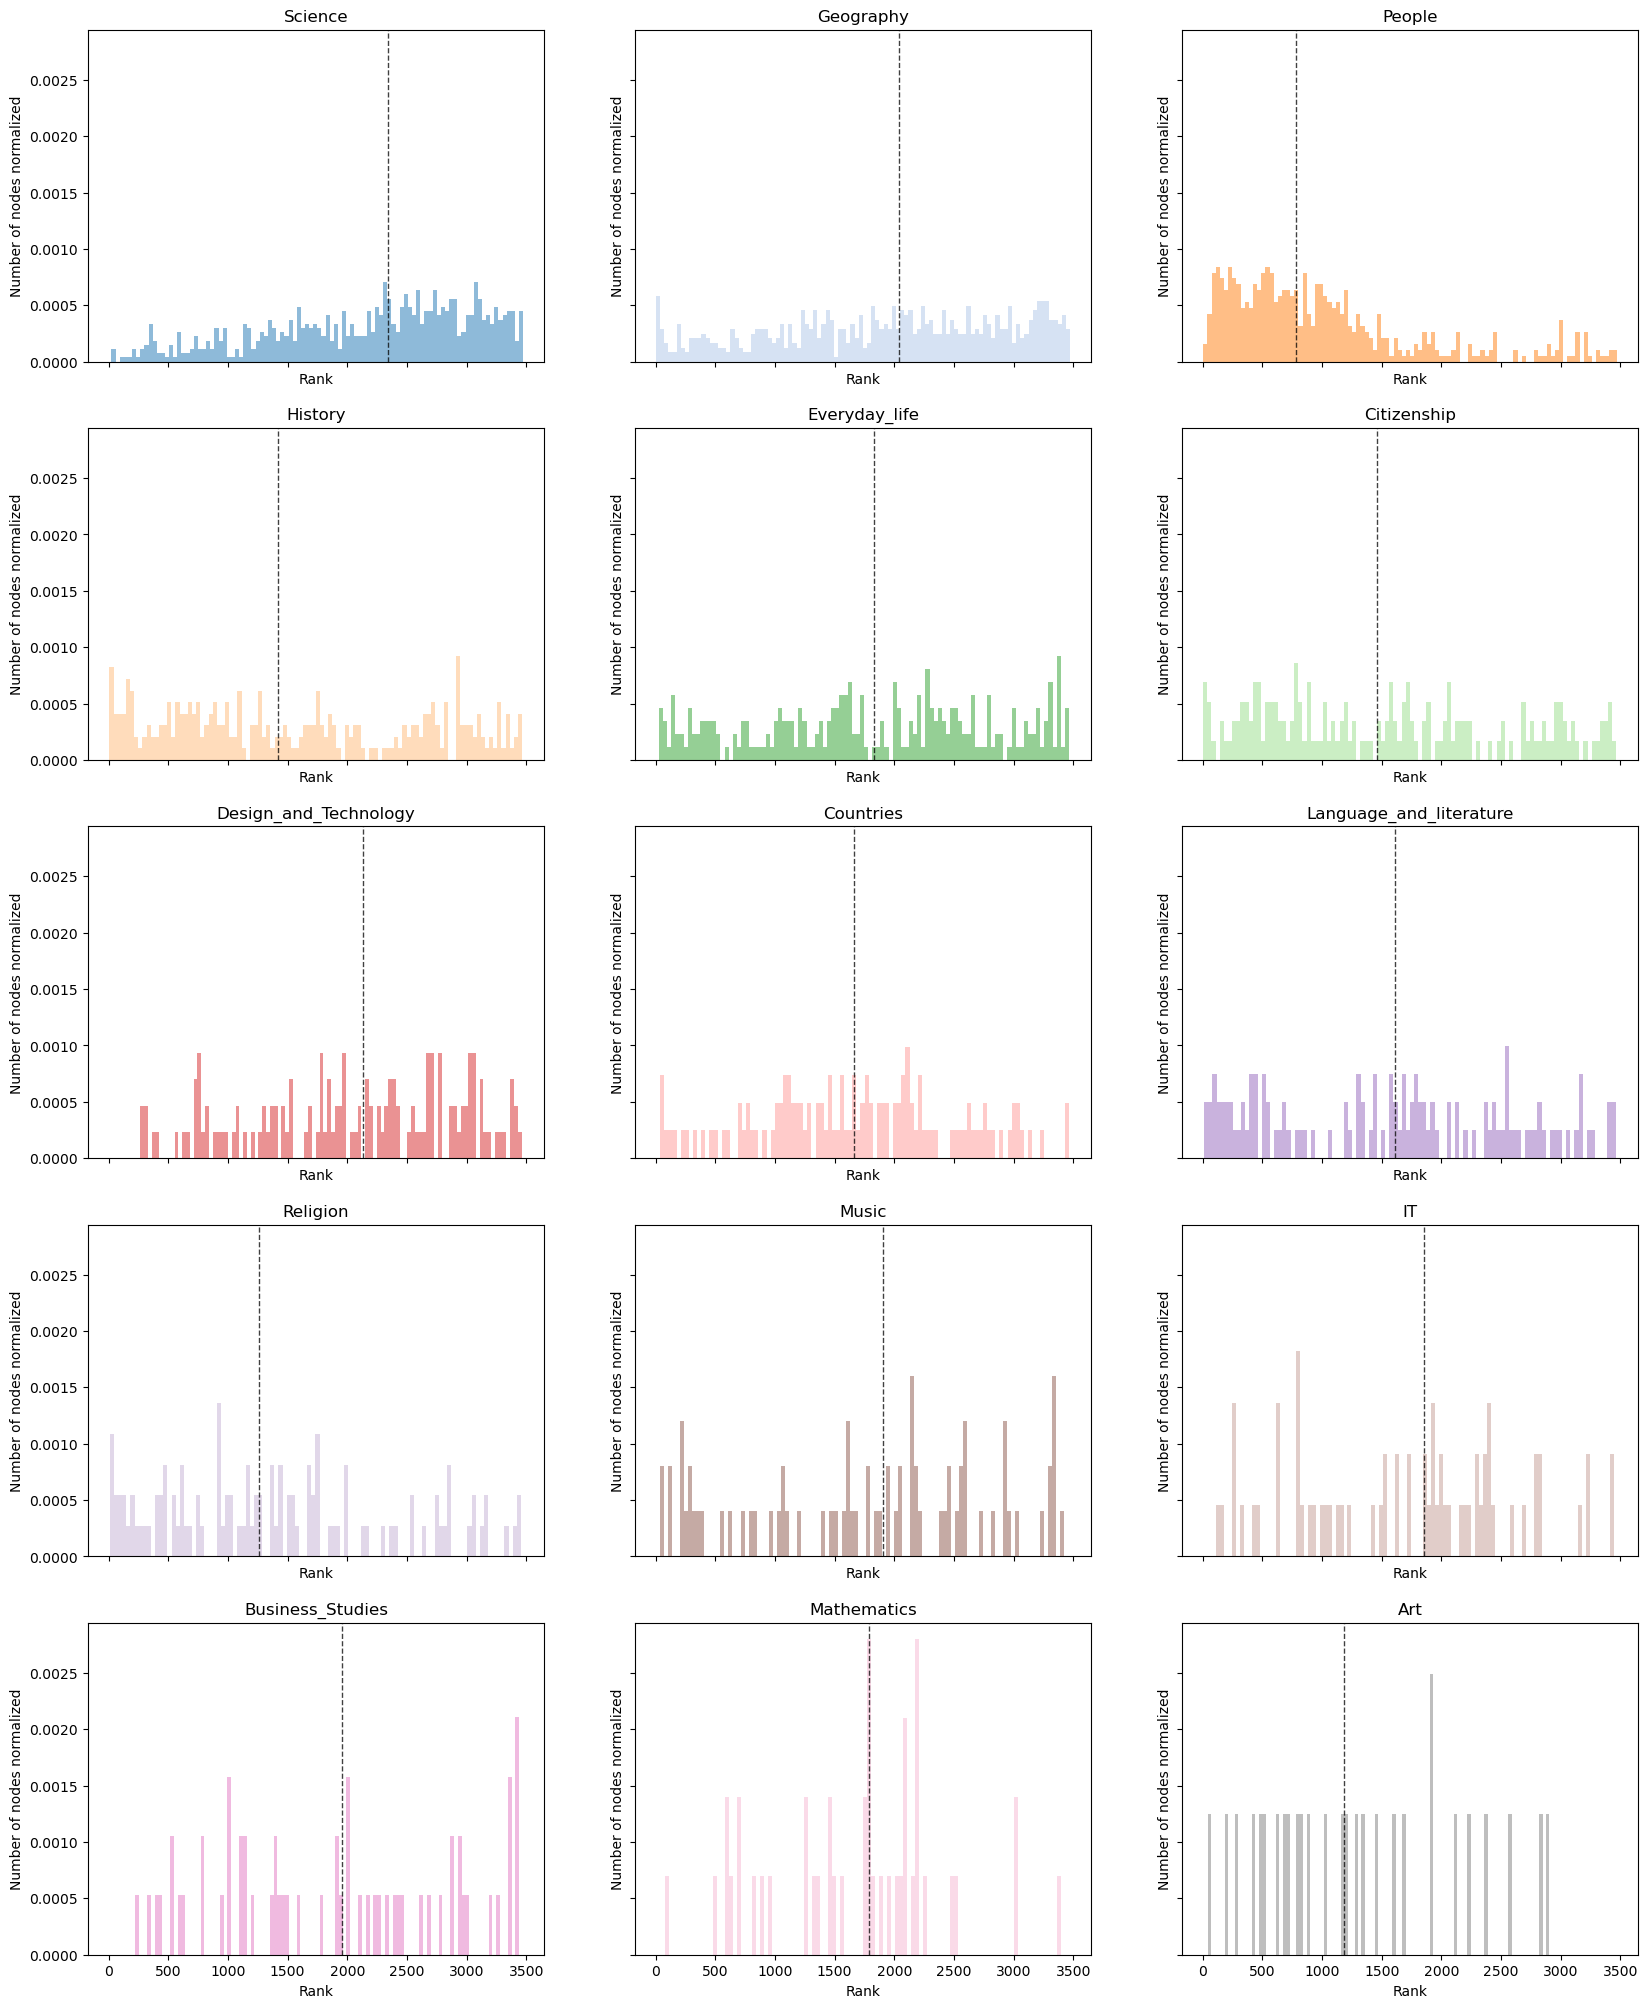

In [19]:
graph_category_rank(df_pagerank_both_gend)

In [20]:
df_rank_links = sort_and_rank(df_pagerank_links)
df_rank_links["MainCat"] = df_rank_links.apply(lambda row: get_cat(row["Node"]), axis=1)   
all_cat = df_rank_links["MainCat"].value_counts().index.to_list()

len(all_cat)

15

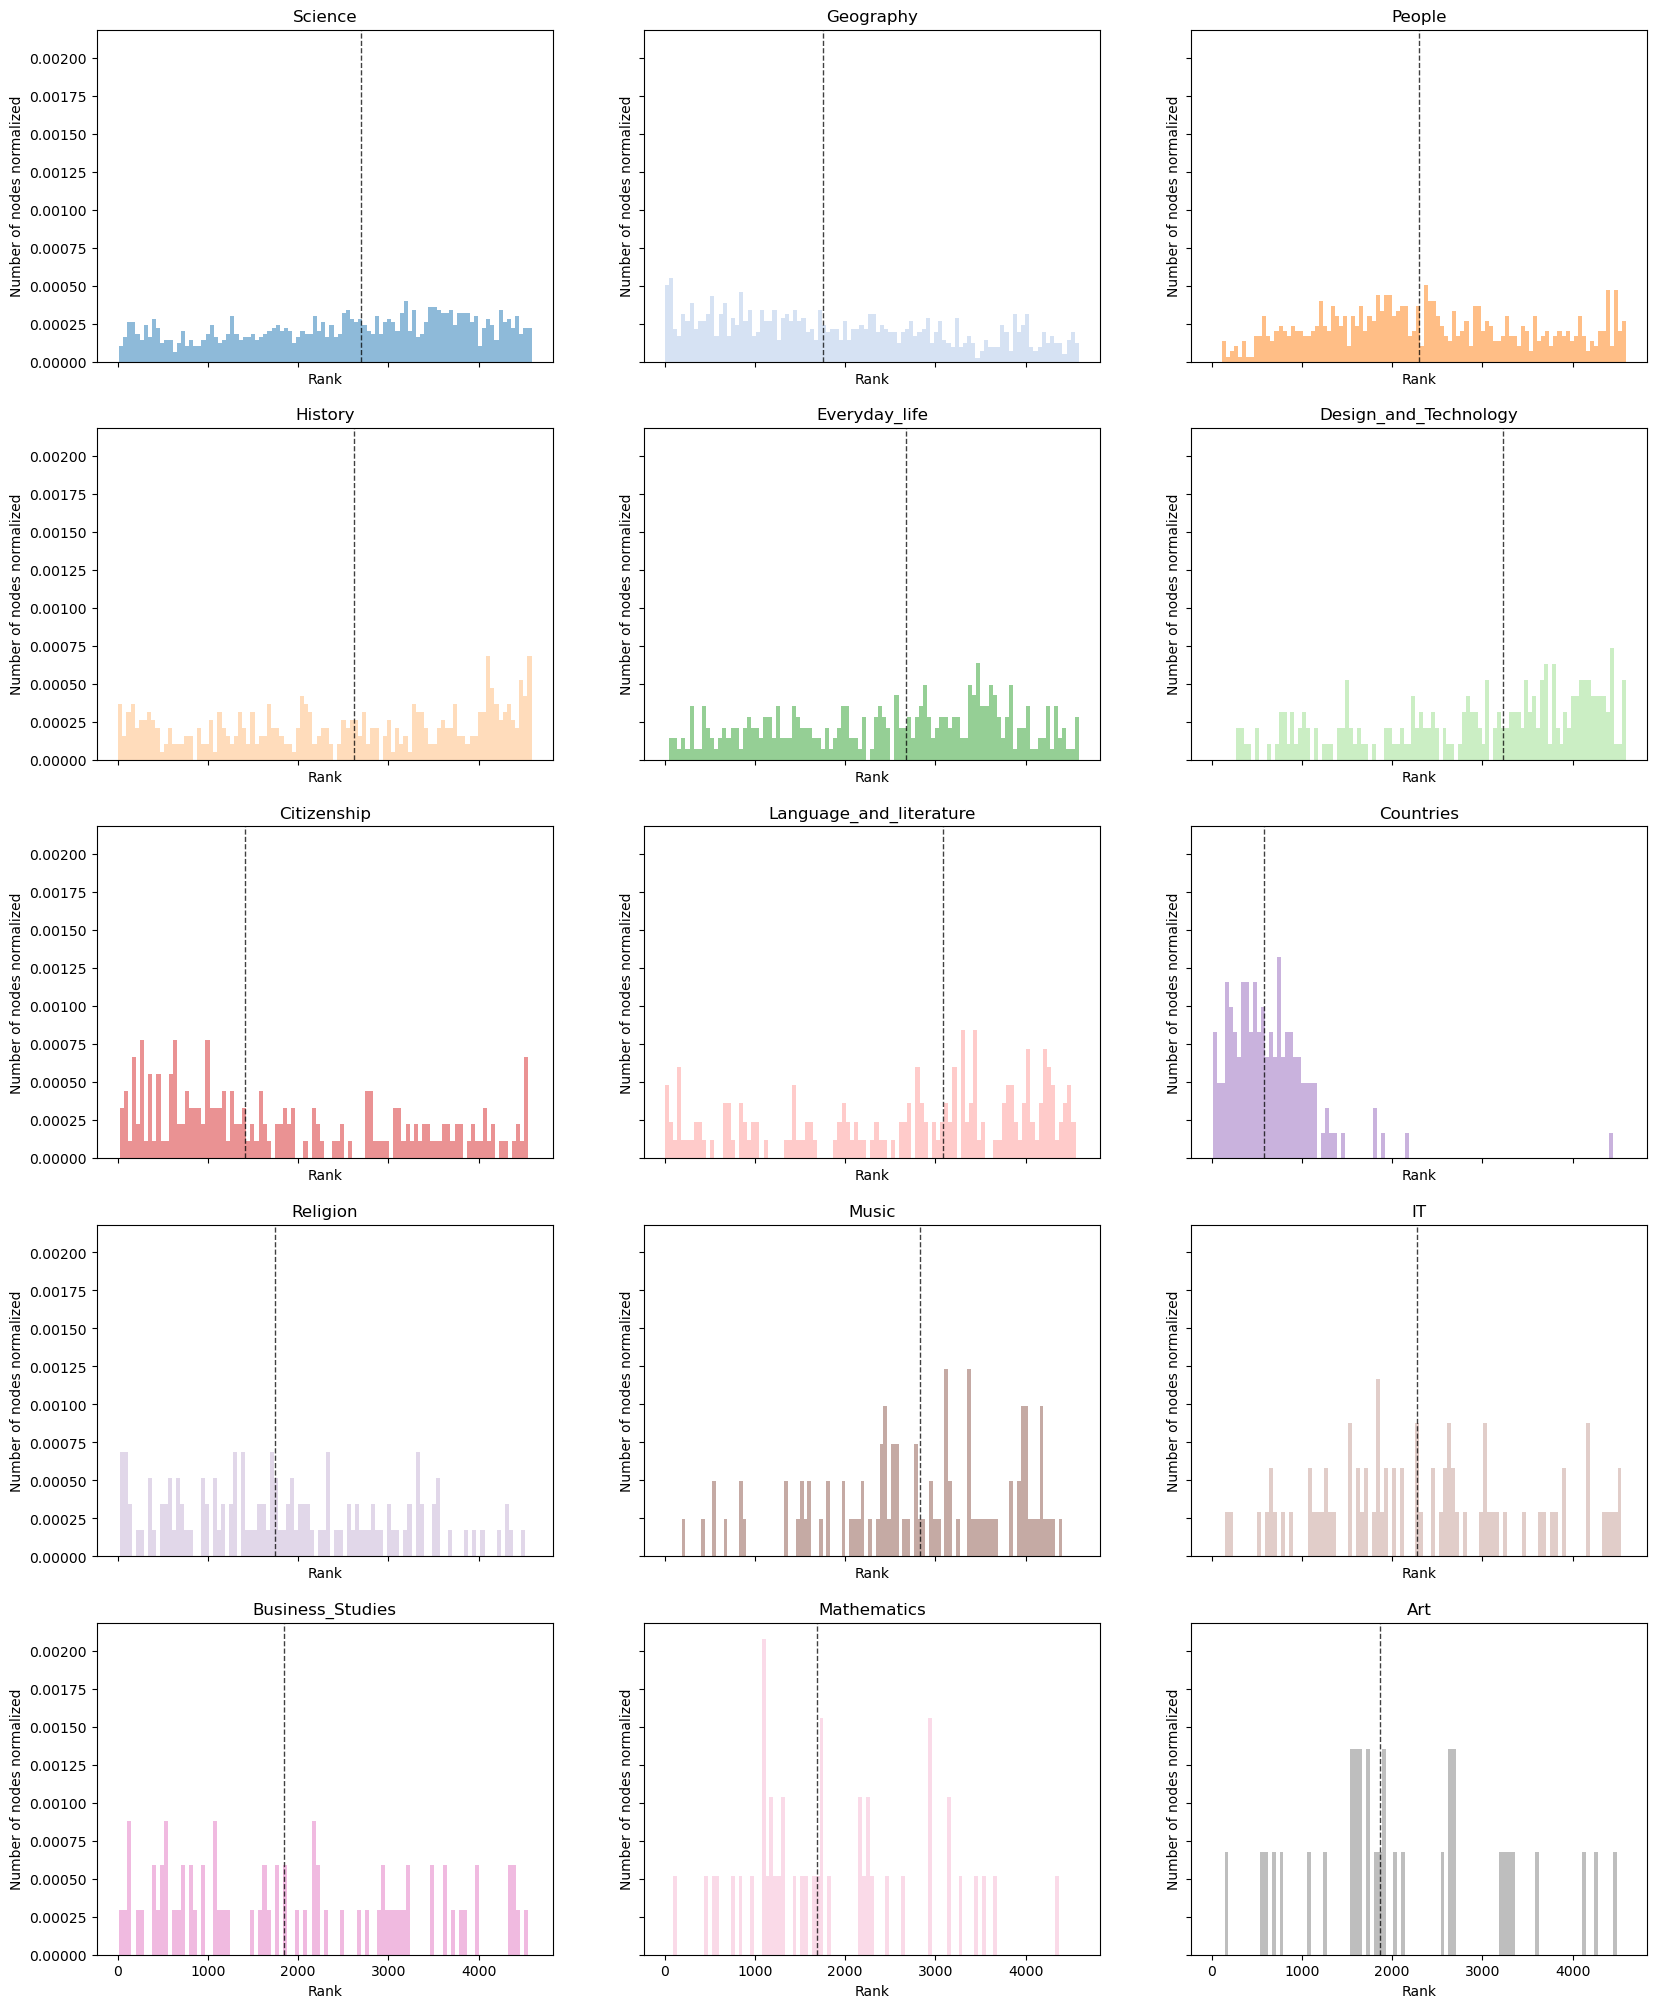

In [21]:
graph_category_rank(df_rank_links)

In [22]:
all_path_graph = create_graph_path(dfs)
df_pagerank_all_path = get_df_pagerank(all_path_graph)
df_rank_all_path = sort_and_rank(df_pagerank_all_path)
df_rank_all_path["MainCat"] = df_rank_all_path.apply(lambda row: get_cat(row["Node"]), axis=1)
all_cat = df_rank_all_path["MainCat"].value_counts().index.to_list()
print(len(all_cat))

15


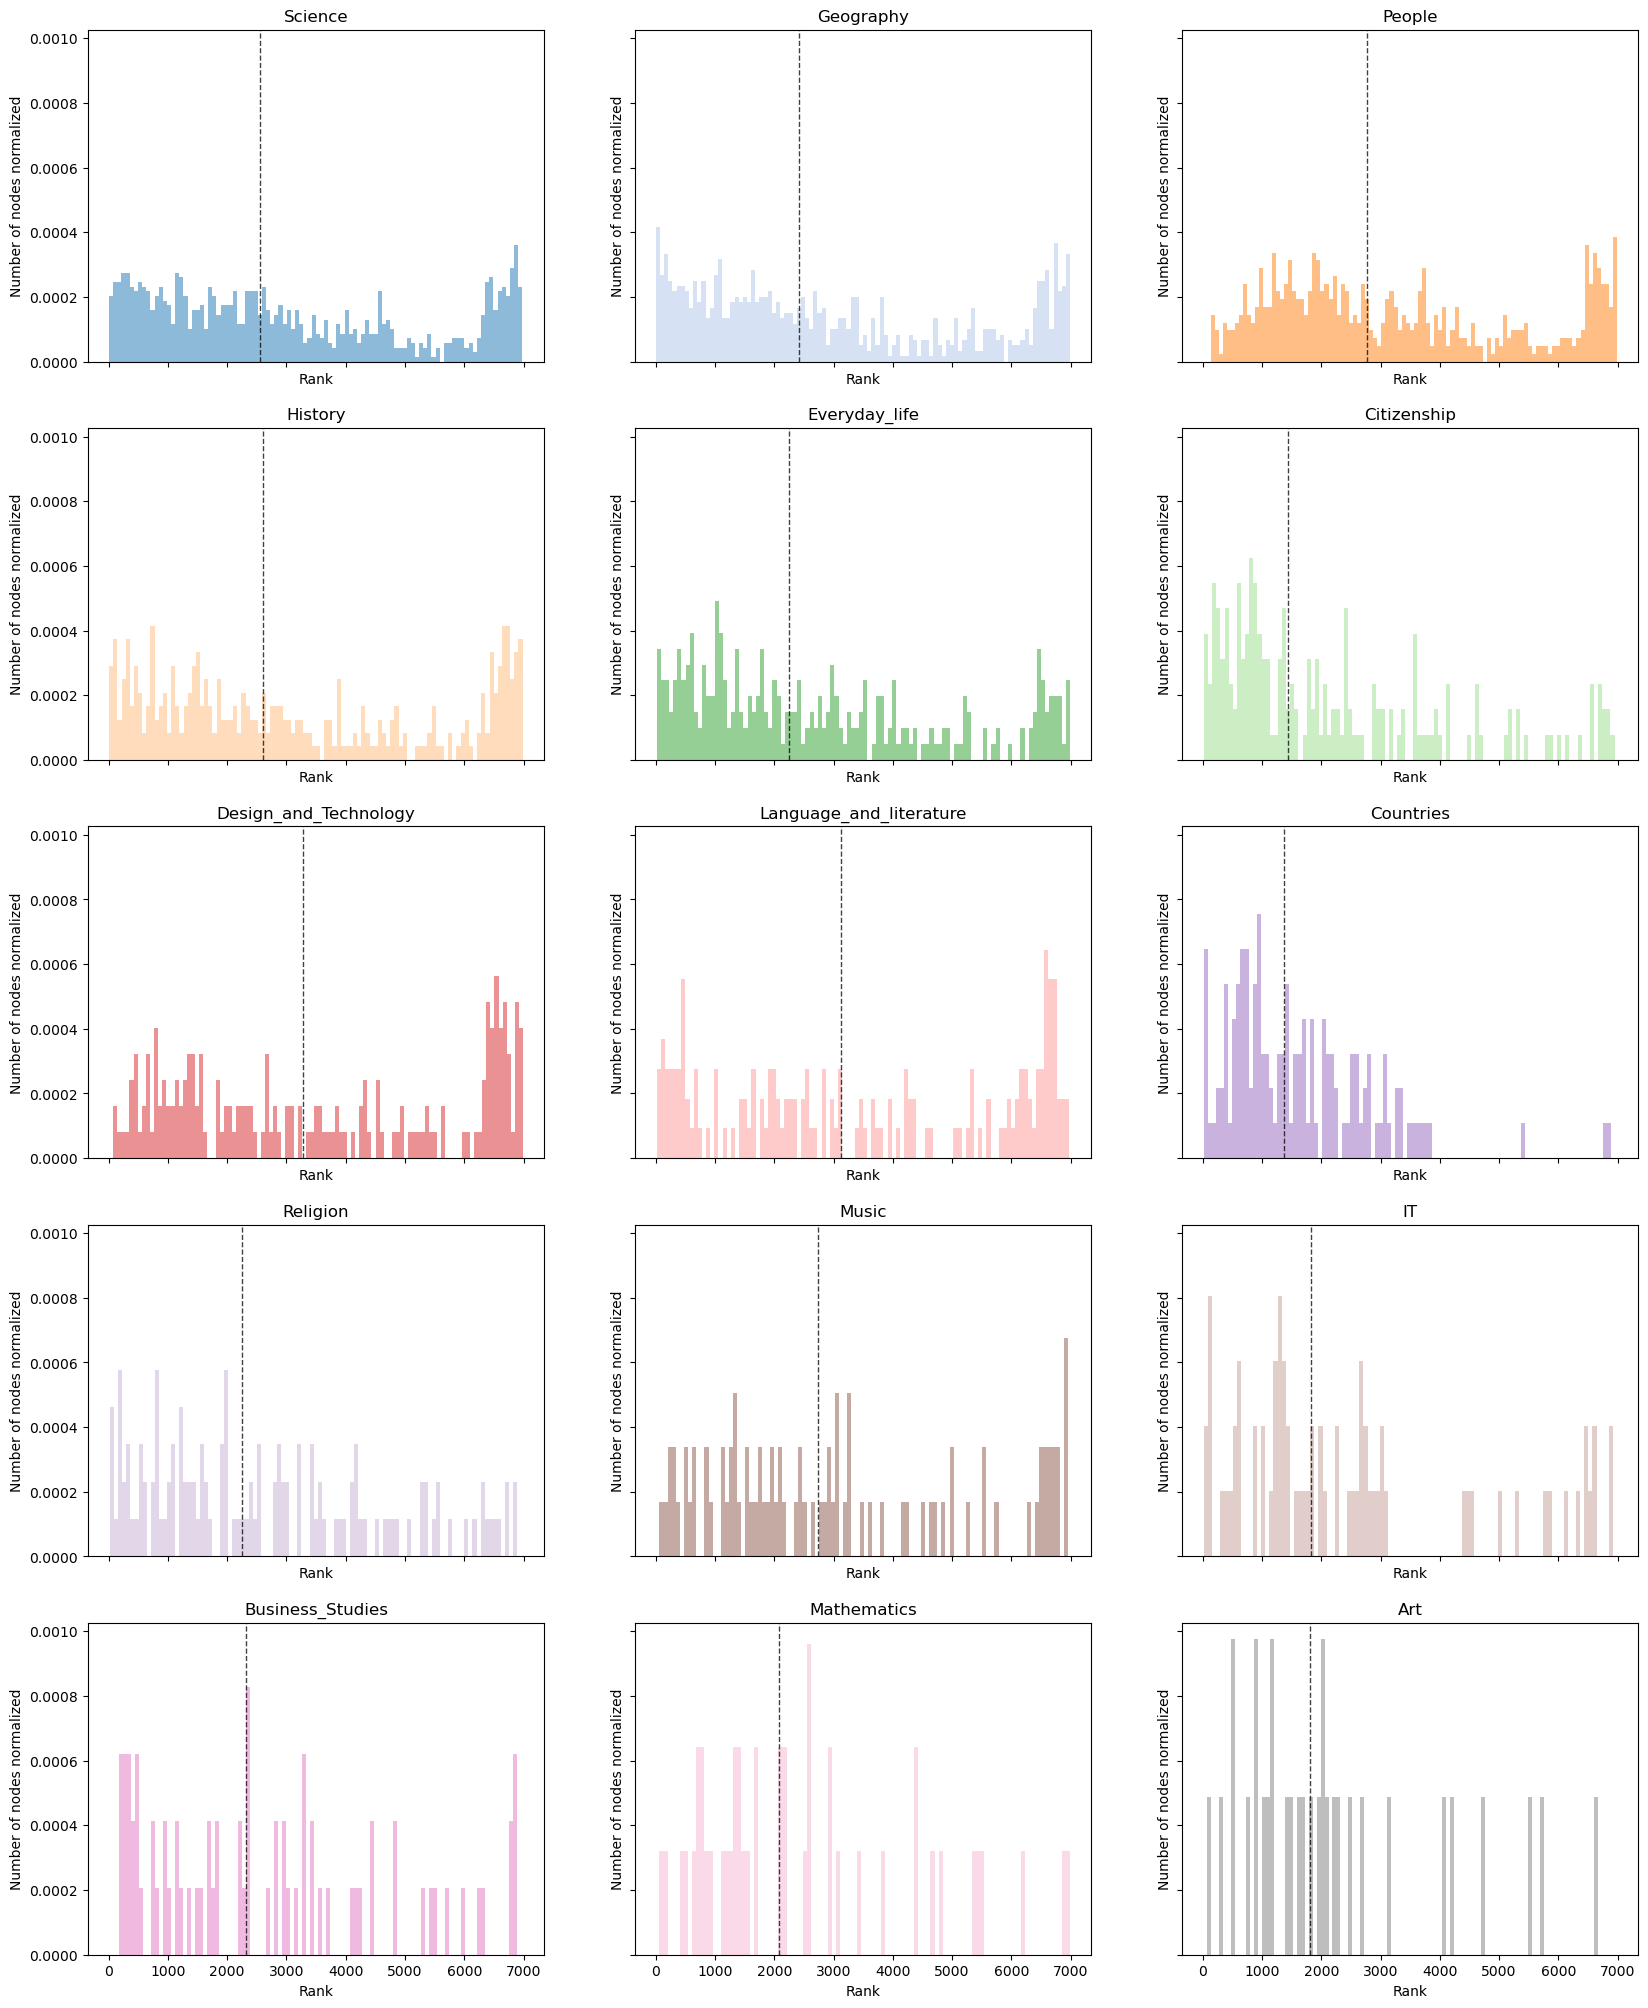

In [23]:
graph_category_rank(df_rank_all_path)

In [24]:
def get_median_rank_per_cat(df, all_cat):
    data = {}
    for cat in all_cat:
        data[cat] = df.loc[df["MainCat"] == cat, "Rank"].median()

    df_out = pd.DataFrame(list(data.items()), columns=['MainCat', 'MedianRank']).set_index("MainCat")
    
    return df_out
    

In [25]:
median_all_path = get_median_rank_per_cat(df_rank_all_path, all_cat)

In [26]:
median_all_links = get_median_rank_per_cat(df_rank_links, all_cat)

In [27]:
median_both_gen = get_median_rank_per_cat(rank_both_gender, all_cat)

In [28]:
all_median = pd.concat([median_all_path, median_all_links, median_both_gen], axis=1)

In [29]:
all_median.columns = ["AllPath", "AllLinks", "BothGender"]
all_median.head(15)

,AllPath,AllLinks,BothGender
MainCat,,,
Science,2548.0,2692.0,2342.0
Geography,2409.0,1760.0,2037.0
People,2765.0,2296.0,785.5
History,2607.0,2617.0,1423.5
Everyday_life,2246.5,2673.0,1830.0
Citizenship,1439.0,1415.0,1463.0
Design_and_Technology,3275.0,3231.5,2134.0
Language_and_literature,3121.0,3084.0,1608.0
Countries,1365.0,580.5,1663.0


In [ ]:
# Faire une graph avec les catégories, plus la node est grosse plus il y a de nodes dans cette catégorie et plus le lien entre deux catégorie est fort plus il y a de lien entre les deux catégories
# NetworkX avec les people au centre et leur paths qui les rejoint, couleur par catégorie 

In [30]:
def create_grap_cats(dfs, categories_dict):
    """
    Create a graph with the categories as nodes and the links between them as edges

    Args:
        dfs (dict): Dictionary of the dataframes
        categories_dict (dict): Dictionary of the categories of the nodes
    """

    G = nx.DiGraph()

    path_finished_dfs = dfs["paths_finished"]
    path_unfinished_dfs = dfs["paths_unfinished"]

    for index, row in path_finished_dfs.iterrows():

        path = row['path'].split(';')
        
        # Gets the category of the first node in the path that has a category  
        start = 0  
        for i in range(len(path)- 1):
            try:
                category_from = categories_dict[path[i]]['main_subject']
                start = i  
                G.add_node(category_from, weight=1)
                break
            except KeyError as e:
                #print("KeyError for ", e, " in ", path[i], "index is ", i)
                continue

        # We go from start + 1 to not get twice the same node and we go to len(path) - 2 to not get the last node
        for i in range(start + 1, len(path)- 2):
            
            # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
            if path[i+1][0] == '.': 
                continue
            
            # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
            if path[i][0] == ".":
                path[i] = path[i][1:]


            try: 
                category_to = categories_dict[path[i]]['main_subject']

            except KeyError as e:
                #print("Cat_to KeyError for ", e, " in ", path[i], "index is ", i)
                continue
            

            if G.has_node(category_to):
                 G.nodes[category_to]['weight'] += 1
            else:
                G.add_node(category_to, weight=1)
            

            if G.has_edge(category_from, category_to):
                G[category_from][category_to]['weight'] += 1
            else:
                G.add_edge(category_from, category_to, weight=1)

            
        
            category_from = category_to
            

    for index, row in path_unfinished_dfs.iterrows():

        path = row['path'].split(';')
        
        # Gets the category of the first node in the path that has a category  
        start = 0  
        for i in range(len(path)- 1):
            try:
                category_from = categories_dict[path[i]]['main_subject']
                start = i  
                G.add_node(category_from, weight=1)
                break
            except KeyError as e:
                #print("KeyError for ", e, " in ", path[i], "index is ", i)
                continue

        # We go from start + 1 to not get twice the same node 
        for i in range(start + 1, len(path)- 1):
            
            # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
            if path[i+1][0] == '.': 
                continue
            
            # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
            if path[i][0] == ".":
                path[i] = path[i][1:]


            try: 
                category_to = categories_dict[path[i]]['main_subject']

            except KeyError as e:
                #print("Cat_to KeyError for ", e, " in ", path[i], "index is ", i)
                continue
            

            if G.has_node(category_to):
                 G.nodes[category_to]['weight'] += 1
            else:
                G.add_node(category_to, weight=1)
            

            if G.has_edge(category_from, category_to):
                G[category_from][category_to]['weight'] += 1
            else:
                G.add_edge(category_from, category_to, weight=1)

            
        
            category_from = category_to

    return G


In [32]:
def create_grap_cats_gender(dfs, categories_dict):
    """
    Create a graph with the categories as nodes and the links between them as edges

    Args:
        dfs (dict): Dictionary of the dataframes
        categories_dict (dict): Dictionary of the categories of the nodes
    """

    G = nx.DiGraph()

    path_finished_dfs = dfs["paths_finished"]
    path_unfinished_dfs = dfs["paths_unfinished"]

    for index, row in path_finished_dfs.iterrows():

        path = row['path'].split(';')
        
        try: 
            gender_last = gender_dict[path[-1]]
        except KeyError as e:
            #print("KeyError for ", e)
            continue
        
        # The isinstace is required otherwise math.isnan(gender_last) will throw an error
        if isinstance(gender_last, float) and math.isnan(gender_last):
            continue

        # If it is the good gender we add the entire path to the graph
        if gender_last == "Male" or gender_last == "Female":

            # Gets the category of the first node in the path that has a category  
            start = 0  
            for i in range(len(path)- 1):
                try:
                    category_from = categories_dict[path[i]]['main_subject']
                    start = i  
                    G.add_node(category_from, weight=1)
                    break
                except KeyError as e:
                    #print("KeyError for ", e, " in ", path[i], "index is ", i)
                    continue

            # We go from start + 1 to not get twice the same node and we go to len(path) - 2 to not get the last node
            for i in range(start + 1, len(path)- 2):
                
                # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
                if path[i+1][0] == '.': 
                    continue
                
                # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
                if path[i][0] == ".":
                    path[i] = path[i][1:]


                try: 
                    category_to = categories_dict[path[i]]['main_subject']

                except KeyError as e:
                    #print("Cat_to KeyError for ", e, " in ", path[i], "index is ", i)
                    continue
                

                if G.has_node(category_to):
                    G.nodes[category_to]['weight'] += 1
                else:
                    G.add_node(category_to, weight=1)
                

                if G.has_edge(category_from, category_to):
                    G[category_from][category_to]['weight'] += 1
                else:
                    G.add_edge(category_from, category_to, weight=1)

                
            
                category_from = category_to
            
    

    for index, row in path_unfinished_dfs.iterrows():

        path = row['path'].split(';')

        try: 
            gender_last = gender_dict[row["target"]]
        except KeyError as e:
            #print("KeyError for ", e)
            continue

        if isinstance(gender_last, float) and math.isnan(gender_last):
            continue
        
        if gender_last == "Male" or gender_last == "Female":
        
            # Gets the category of the first node in the path that has a category  
            start = 0  
            for i in range(len(path)- 1):
                try:
                    category_from = categories_dict[path[i]]['main_subject']
                    start = i  
                    G.add_node(category_from, weight=1)
                    break
                except KeyError as e:
                    #print("KeyError for ", e, " in ", path[i], "index is ", i)
                    continue

            # We go from start + 1 to not get twice the same node 
            for i in range(start + 1, len(path)- 1):
                
                # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
                if path[i+1][0] == '.': 
                    continue
                
                # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
                if path[i][0] == ".":
                    path[i] = path[i][1:]


                try: 
                    category_to = categories_dict[path[i]]['main_subject']

                except KeyError as e:
                    #print("Cat_to KeyError for ", e, " in ", path[i], "index is ", i)
                    continue
                

                if G.has_node(category_to):
                    G.nodes[category_to]['weight'] += 1
                else:
                    G.add_node(category_to, weight=1)
                

                if G.has_edge(category_from, category_to):
                    G[category_from][category_to]['weight'] += 1
                else:
                    G.add_edge(category_from, category_to, weight=1)

                
            
                category_from = category_to

    return G


/var/folders/vc/spg08phs0ps3nf4mm0r8qjgc0000gn/T/ipykernel_94234/3269535330.py:39: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edges = nx.draw_networkx_edges(


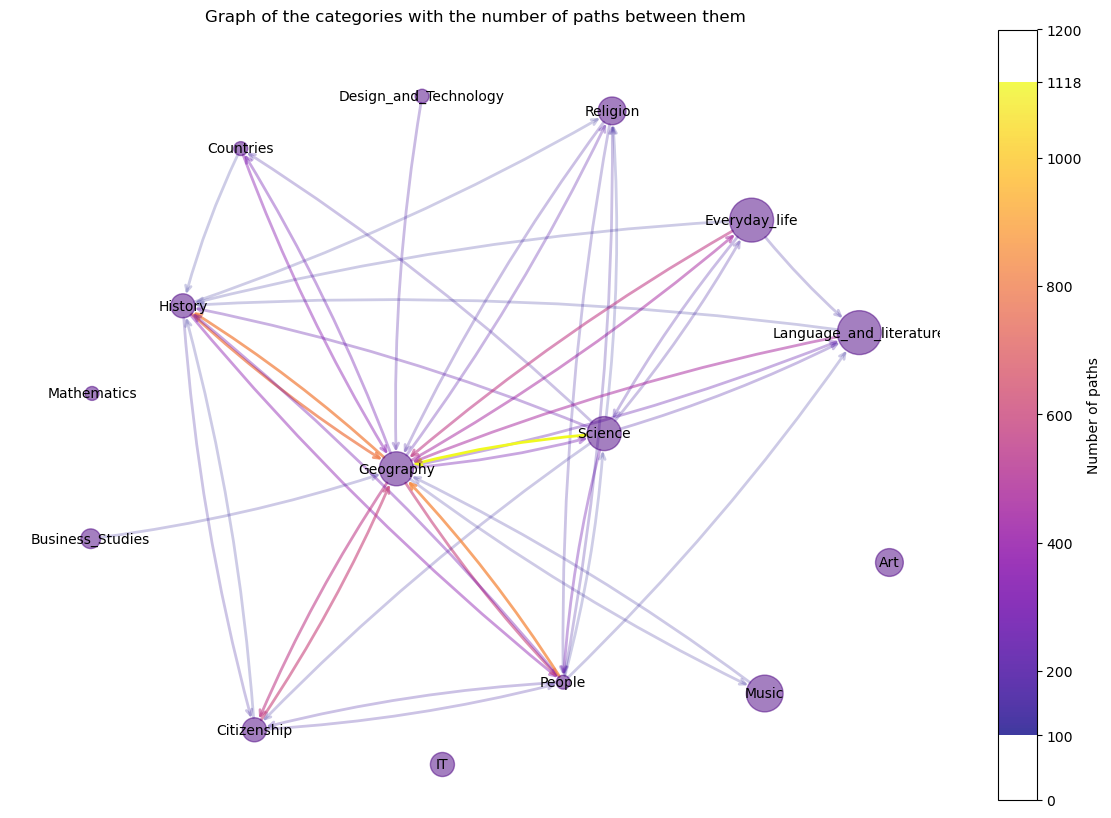

In [33]:
import matplotlib as mpl
MIN_WEIGHT = 100

grap_test = create_grap_cats_gender(dfs, result_dict)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))

pos = nx.spring_layout(grap_test, k=30, iterations=100)
grap_test.remove_edges_from(nx.selfloop_edges(grap_test))

# We remouve the edges that are not strong enough
to_remove = [(a,b) for a, b, attrs in grap_test.edges(data=True) if attrs["weight"] < MIN_WEIGHT]
grap_test.remove_edges_from(to_remove)


weights = nx.get_node_attributes(grap_test, 'weight')
node_sizes=[v * 100 for v in weights.values()]


edge_colors = [grap_test[u][v]['weight'] for u,v in grap_test.edges()]

# Do linear interpolation for the edge alpha
max_weight = max(edge_colors)
min_weight = min(edge_colors)
edge_alphas = 0.2 + (1-0.2)/(max_weight - min_weight) * (np.array(edge_colors) - min_weight)
edge_alphas = np.clip(edge_alphas, 0.2, 1)



M = grap_test.number_of_edges()
N = grap_test.number_of_nodes()
cmap = plt.cm.plasma


nx.draw_networkx_labels(grap_test, pos, font_size=10, font_color="Black", font_family="sans-serif")

node_colors = [(0.294,0,0.51, 0.5) for i in range(N)]
nodes = nx.draw_networkx_nodes(grap_test, pos, node_size=node_sizes, node_color=node_colors)
edges = nx.draw_networkx_edges(
    grap_test,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
    connectionstyle='arc3, rad = 0.05'
)

for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
   


pc = mpl.collections.PatchCollection(edges, cmap=cmap, alpha=0.8)
pc.set_array(edge_colors)
pc.set_clim([MIN_WEIGHT, max_weight])


ax = plt.gca()
ax.set_axis_off()
ax.set_title("Graph of the categories with the number of paths between them")

cbar = plt.colorbar(pc, ax=ax, label="Number of paths")

# Get the default ticks and tick labels
ticks = list(cbar.get_ticks())

# Append the ticks (and their labels) for minimum and the maximum value
cbar.set_ticks([MIN_WEIGHT, max_weight] + ticks)
plt.savefig('docs/path_graph.png', bbox_inches='tight')
plt.show()



In [34]:
def create_graph_Gender_n_last(path_finished_dfs, path_unfinished_dfs, gender_dict, target_gender: str, last_node_from_path: bool = False, both_gender = False, n=3):
    """
    Creates a graph of all the paths where the gender of the target node is equal to target_gender. 
    If Both_gender is True, creates a graph of the paths where a Male or a Female is the target node. 

    Args:
        path_finished_dfs (dataframe): dataframe of the finished paths
        path_unfinished_dfs (dataframe): dataframe of the unfinished paths
        gender_dict (dict): dict of the gender of the nodes 
        target_gender (str): gender of the taget node 
        last_node_from_path (bool, optional): If True, the target node is the created grap. Defaults to False.
        both_gender (bool): If true, both gender are added to the graph. Defaults to False.

    Returns:
        G (graph): graph of the paths
        endnode_names (list): list of the names of the target nodes, this lists contains repetitions if the target node is the same in multiple paths
    
    """    

    G = nx.DiGraph()
    endnode_names = []
    indexing_correction = 1 if last_node_from_path else 0
    

    for index, row in path_finished_dfs.iterrows():

        path = row['path'].split(';')

        try: 
            gender_last = gender_dict[path[-1]]
        except KeyError as e:
            # BEACOUP DE KEY ERROR TODO !!
            #print("KeyError for ", e)
            continue
        
        # The isinstace is required otherwise math.isnan(gender_last) will throw an error
        if isinstance(gender_last, float) and math.isnan(gender_last):
            continue
        
        # If it is the good gender we add the entire path to the graph
        if gender_last == target_gender or (both_gender and (gender_last == "Male" or gender_last == "Female")):
            endnode_names.append(path[-1])
            
            edges_to_add = []
            # Add the path to the graph or adds 1 to the weight if the edge already exists
            for i in range(len(path)-1 -indexing_correction):
                
                # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
                if path[i+1][0] == '.': 
                    continue
                
                # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
                if path[i][0] == ".":
                    path[i] = path[i][1:]
                
                edges_to_add.append((path[i], path[i+1]))
        
            # We add only the last n edges of the path to the graph
            starting_index = len(edges_to_add)-1
            for i in range(starting_index, max(starting_index-n, -1), -1):
                tuple_to_add = edges_to_add[i]

                if G.has_edge(tuple_to_add[0], tuple_to_add[1]):
                    G[tuple_to_add[0]][tuple_to_add[1]]['weight'] += 1
                else:
                    G.add_edge(tuple_to_add[0], tuple_to_add[1], weight=1)

    for index, row in path_unfinished_dfs.iterrows():

        path = row['path'].split(';')

        try: 
            gender_last = gender_dict[row["target"]]
        except KeyError as e:
            #print("KeyError for ", e)
            continue

        if isinstance(gender_last, float) and math.isnan(gender_last):
            continue
        
        
        if gender_last == target_gender or (both_gender and (gender_last == "Male" or gender_last == "Female")):
            endnode_names.append(row["target"])

            edges_to_add = []
            for i in range(len(path) -1 -indexing_correction):

                # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
                if path[i+1][0] == '.': 
                    continue
                
                # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
                if path[i][0] == ".":
                    path[i] = path[i][1:]

                edges_to_add.append((path[i], path[i+1]))
            
            # We add only the last 3 edges of the path to the graph
            starting_index = len(edges_to_add)-1
            for i in range(starting_index, max(starting_index-n, -1), -1):
                tuple_to_add = edges_to_add[i]

                if G.has_edge(tuple_to_add[0], tuple_to_add[1]):
                    G[tuple_to_add[0]][tuple_to_add[1]]['weight'] += 1
                else:
                    G.add_edge(tuple_to_add[0], tuple_to_add[1], weight=1)

    return G, endnode_names

In [35]:
both_gender_3_last, _ = create_graph_Gender_n_last(dfs["paths_finished"], dfs["paths_unfinished"] , gender_dict, "Male", last_node_from_path= False, both_gender=True, n=3) 

In [36]:
df_pagerank_last_3 = get_df_pagerank(both_gender_3_last)
df_rank_last_3 = sort_and_rank(df_pagerank_last_3)
df_rank_last_3["MainCat"] = df_rank_last_3.apply(lambda row: get_cat(row["Node"]), axis=1)
all_cat = df_rank_last_3["MainCat"].value_counts().index.to_list()
print(len(all_cat))

15


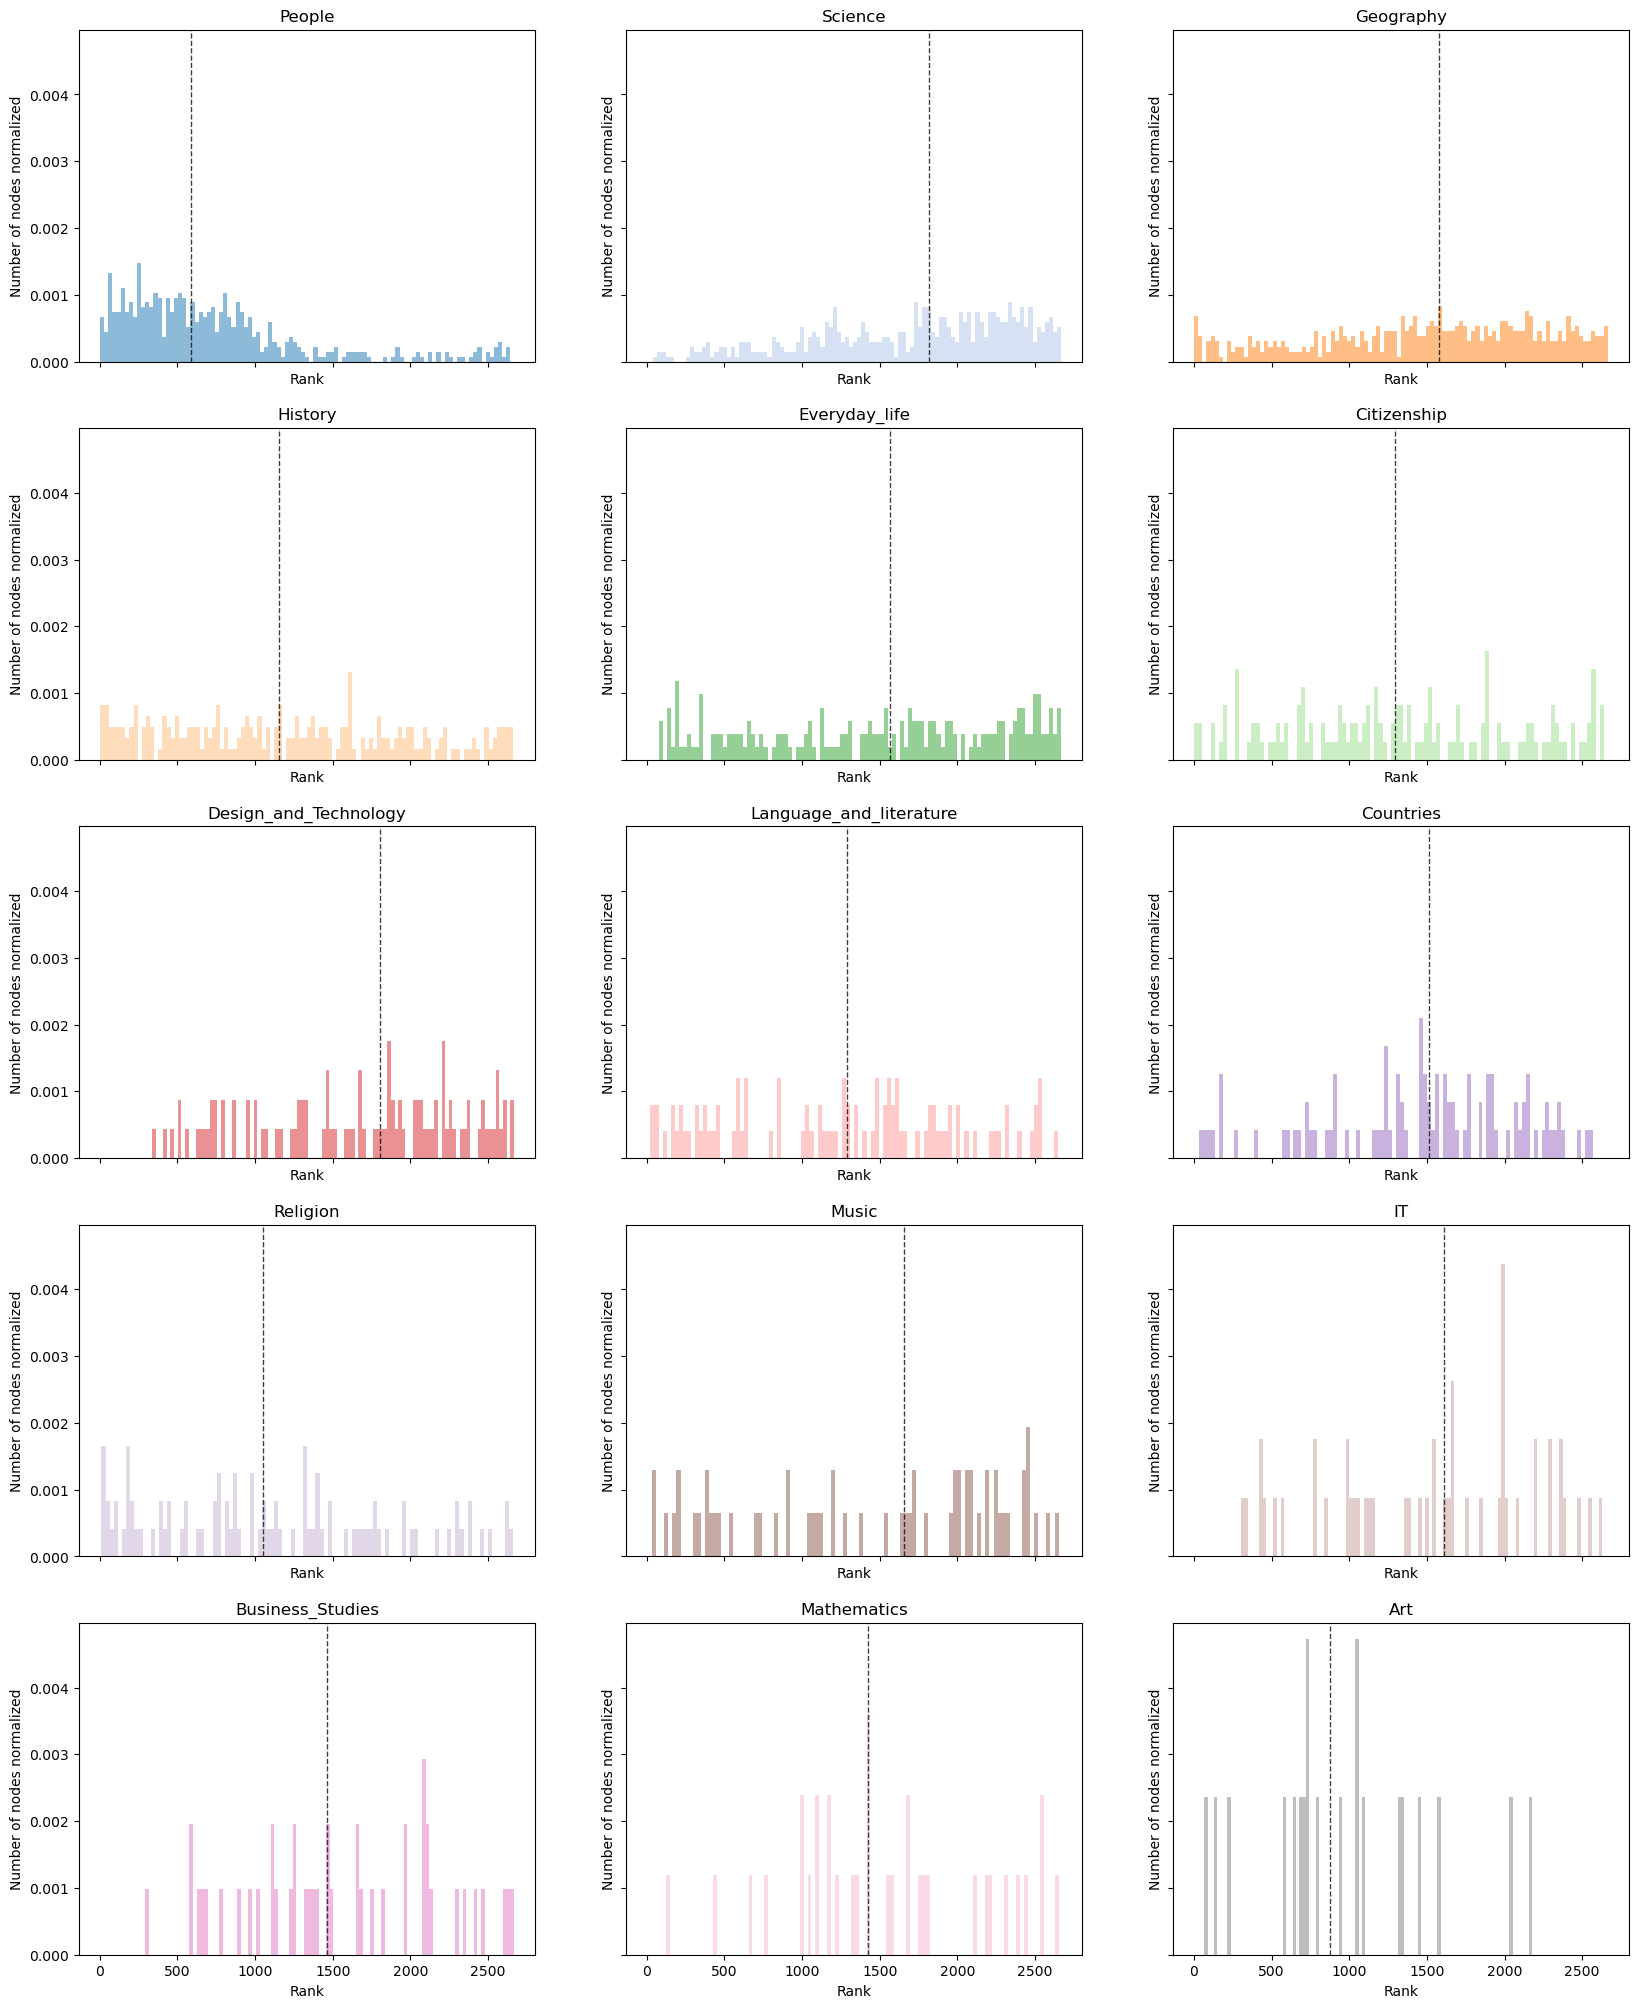

In [37]:
graph_category_rank(df_rank_last_3)

In [38]:
medians = []
for n in range(7, 0, -1):
    both_gender_n_last, _ = create_graph_Gender_n_last(dfs["paths_finished"], dfs["paths_unfinished"] , gender_dict, "Male", last_node_from_path= False, both_gender=True, n=n) 
    number_of_nodes = both_gender_n_last.number_of_nodes()
    df_pagerank_last_n = get_df_pagerank(both_gender_n_last)
    df_rank_last_n = sort_and_rank(df_pagerank_last_n)
    df_rank_last_n["MainCat"] = df_rank_last_n.apply(lambda row: get_cat(row["Node"]), axis=1)
    all_cat = df_rank_last_n["MainCat"].value_counts().index.to_list()

    median_all_path = get_median_rank_per_cat(df_rank_last_n, all_cat)
    median_all_path_normalised = median_all_path / max(df_rank_last_n["Rank"])
    medians.append(median_all_path_normalised)

all_median = pd.concat(medians, axis=1)
all_median.columns = ["7", "6", "5", "4", "3", "2", "1"]
all_median.head(15)

    

,7,6,5,4,3,2,1
MainCat,,,,,,,
Science,0.662174,0.662766,0.670815,0.668426,0.680779,0.698668,0.690462
Geography,0.579680,0.579358,0.588052,0.580996,0.592357,0.601286,0.602399
People,0.220823,0.220672,0.219820,0.222369,0.219183,0.231511,0.243710
History,0.429799,0.428443,0.430616,0.433190,0.433308,0.482085,0.602106
Everyday_life,0.537915,0.559856,0.558805,0.561201,0.586737,0.651814,0.572850
Citizenship,0.423874,0.412841,0.419571,0.424117,0.485950,0.557189,0.521943
Design_and_Technology,0.619520,0.615362,0.610765,0.636754,0.676845,0.653422,0.650088
Countries,0.459568,0.466397,0.464530,0.487298,0.567628,0.656867,0.561147
Language_and_literature,0.478673,0.471047,0.458307,0.450841,0.483702,0.510565,0.551200


In [40]:
all_median.T

MainCat,Science,Geography,People,History,Everyday_life,Citizenship,Design_and_Technology,Countries,Language_and_literature,Religion,Music,IT,Business_Studies,Mathematics,Art
7,0.662174,0.579680,0.220823,0.429799,0.537915,0.423874,0.619520,0.459568,0.478673,0.368039,0.547393,0.521031,0.542062,0.530213,0.315462
6,0.662766,0.579358,0.220672,0.428443,0.559856,0.412841,0.615362,0.466397,0.471047,0.366637,0.559556,0.522652,0.538404,0.542754,0.328233
5,0.670815,0.588052,0.219820,0.430616,0.558805,0.419571,0.610765,0.464530,0.458307,0.364655,0.572340,0.575918,0.506223,0.576540,0.336030
4,0.668426,0.580996,0.222369,0.433190,0.561201,0.424117,0.636754,0.487298,0.450841,0.353019,0.597163,0.587265,0.514682,0.519795,0.363741
3,0.680779,0.592357,0.219183,0.433308,0.586737,0.485950,0.676845,0.567628,0.483702,0.393031,0.621581,0.604346,0.549269,0.534657,0.327276
2,0.698668,0.601286,0.231511,0.482085,0.651814,0.557189,0.653422,0.656867,0.510565,0.478411,0.577859,0.541571,0.669270,0.598530,0.548461
1,0.690462,0.602399,0.243710,0.602106,0.572850,0.521943,0.650088,0.561147,0.551200,0.654184,0.638385,0.500878,0.482738,0.673493,0.773552


In [68]:

import plotly.express as px

# Interactive line plot
fig = px.line(all_median.T, x=all_median.T.index, y=all_median.T.columns, width=1200, height=800, title = 'ADD TITLE')
fig.update_layout(xaxis_title='steps before reaching the target', yaxis_title = '')

# Show the plot
fig.show()

<AxesSubplot:>

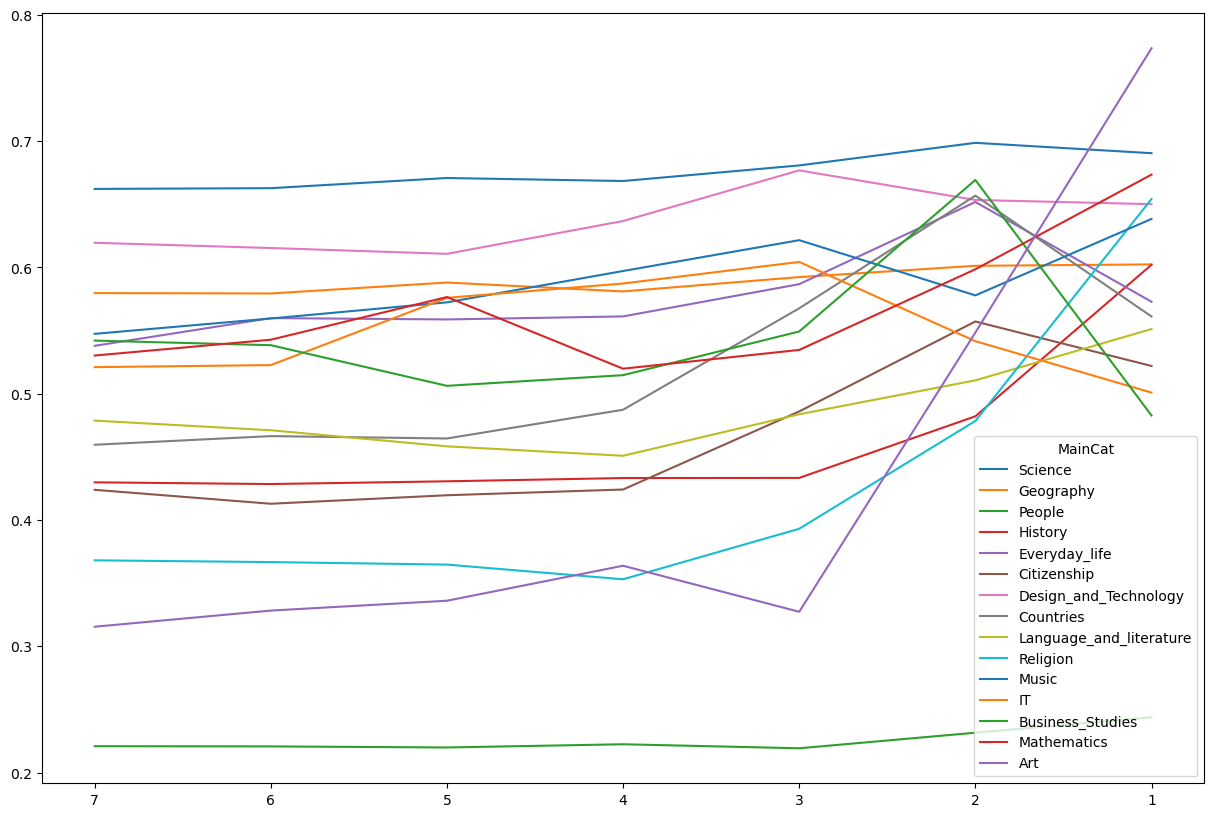

In [ ]:
# Plot the evolution of the ranks of the categories
all_median.T.plot(figsize=(15, 10))